# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Processed Data

In [ ]:
data = pd.read_csv('/content/processed_data.csv')

# Data Understanding

In [ ]:
data.head()

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus
0,Aceh,5.75,6.03,65.12,64.77
1,Sumatera Utara,5.24,5.89,70.60,71.06
2,Sumatera Barat,5.90,5.94,69.96,69.61
3,Riau,4.25,4.23,65.18,64.45
4,Jambi,4.50,4.53,67.88,68.75


In [ ]:
data.describe()

,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus
count,34.000000,34.000000,34.000000,34.000000
mean,4.805588,4.613824,69.009118,69.339412
std,1.441952,1.419065,3.579249,3.597735
min,3.040000,2.270000,63.070000,63.600000
25%,3.730000,3.487500,66.577500,66.662500
50%,4.415000,4.320000,69.060000,69.685000
75%,5.695000,5.762500,71.020000,71.015000
max,7.970000,7.520000,77.190000,77.200000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provinsi                                              34 non-null     object 
 1   Tingkat Pengangguran Terbuka (TPT) - Februari         34 non-null     float64
 2   Tingkat Pengangguran Terbuka (TPT) - Agustus          34 non-null     float64
 3   Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari  34 non-null     float64
 4   Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus   34 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


data yang digunakan adalah data yang elah melalui tahap pre processing, sehingga data telah terformat

# Data Visualization

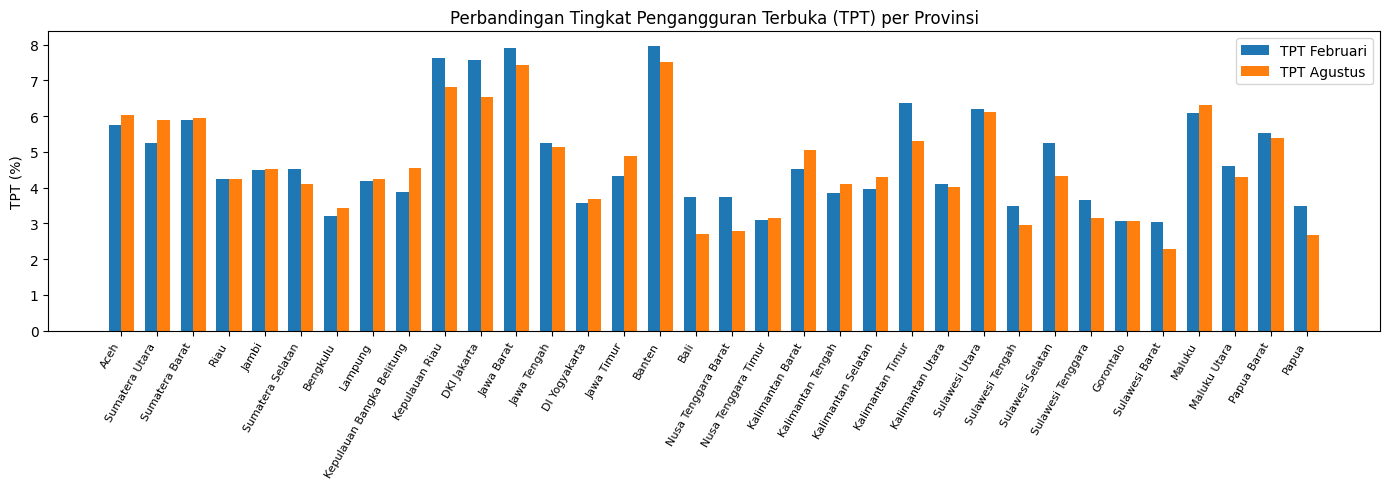

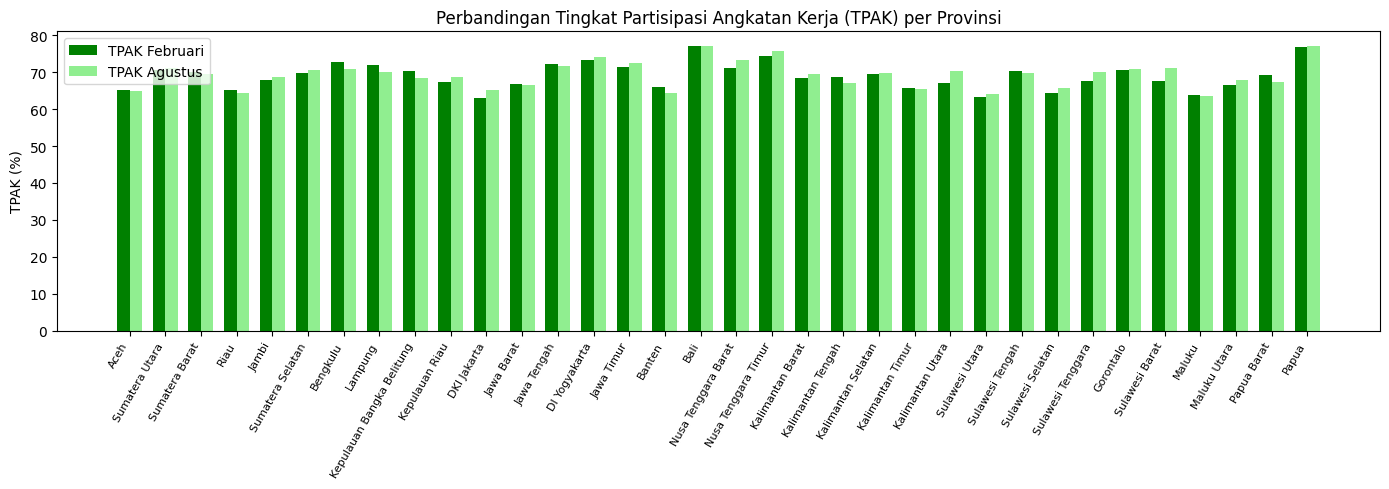

In [ ]:
# TPT Chart (Februari & Agustus)
plt.figure(figsize=(14, 5))
x = range(len(data))
width = 0.35
plt.bar(x, data['Tingkat Pengangguran Terbuka (TPT) - Februari'], width, label='TPT Februari')
plt.bar([i + width for i in x], data['Tingkat Pengangguran Terbuka (TPT) - Agustus'], width, label='TPT Agustus')
plt.xticks([i + width / 2 for i in x], data['Provinsi'], rotation=60, ha='right', fontsize=8)
plt.ylabel('TPT (%)')
plt.title('Perbandingan Tingkat Pengangguran Terbuka (TPT) per Provinsi')
plt.legend()
plt.tight_layout()
plt.show()

# TPAK Chart (Februari & Agustus)
plt.figure(figsize=(14, 5))
plt.bar(x, data['Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari'], width, label='TPAK Februari', color='green')
plt.bar([i + width for i in x], data['Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus'], width, label='TPAK Agustus', color='lightgreen')
plt.xticks([i + width / 2 for i in x], data['Provinsi'], rotation=60, ha='right', fontsize=8)
plt.ylabel('TPAK (%)')
plt.title('Perbandingan Tingkat Partisipasi Angkatan Kerja (TPAK) per Provinsi')
plt.legend()
plt.tight_layout()
plt.show()


Provinsi mana TPT-nya tinggi tapi TPAK-nya rendah? Itu bisa jadi area rawan.

- berdasarkan visualisasi, yang terlihat memiliki gap terbesar

In [ ]:
# Menghitung gap TPT antara Februari dan Agustus
gap_tpt = data['Tingkat Pengangguran Terbuka (TPT) - Februari'] - data['Tingkat Pengangguran Terbuka (TPT) - Agustus']
gap_tpt_sorted = gap_tpt.sort_values(ascending=False)

# Membuat list provinsi dengan gap TPT terbesar ke terkecil
provinsi_gap_tpt = data.loc[gap_tpt_sorted.index, 'Provinsi']
gap_tpt_list = list(zip(provinsi_gap_tpt, gap_tpt_sorted))

gap_tpt_list[:10]

[('Kalimantan Timur', 1.0600000000000005),
 ('Bali', 1.04),
 ('DKI Jakarta', 1.04),
 ('Nusa Tenggara Barat', 0.9300000000000002),
 ('Sulawesi Selatan', 0.9299999999999997),
 ('Papua', 0.8200000000000003),
 ('Kepulauan Riau', 0.8100000000000005),
 ('Sulawesi Barat', 0.77),
 ('Sulawesi Tengah', 0.54),
 ('Sulawesi Tenggara', 0.5100000000000002)]

In [ ]:
# Menghitung gap TPAT antara Februari dan Agustus
gap_tpat = data['Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari'] - data['Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus']
gap_tpat_sorted = gap_tpat.sort_values(ascending=False)

# Membuat list provinsi dengan gap tpat terbesar ke terkecil
provinsi_gap_tpat = data.loc[gap_tpat_sorted.index, 'Provinsi']
gap_tpat_list = list(zip(provinsi_gap_tpat, gap_tpat_sorted))

gap_tpat_list[:10]

[('Papua Barat', 2.1200000000000045),
 ('Lampung', 2.029999999999987),
 ('Kepulauan Bangka Belitung', 1.9899999999999949),
 ('Bengkulu', 1.8100000000000023),
 ('Kalimantan Tengah', 1.5799999999999983),
 ('Banten', 1.5),
 ('Riau', 0.730000000000004),
 ('Jawa Tengah', 0.6099999999999994),
 ('Aceh', 0.3500000000000085),
 ('Sumatera Barat', 0.3499999999999943)]

In [ ]:
# Hitung rata-rata TPT dan TPAK dari Februari dan Agustus
avg_tpt = (data['Tingkat Pengangguran Terbuka (TPT) - Februari'] + data['Tingkat Pengangguran Terbuka (TPT) - Agustus']) / 2
avg_tpak = (data['Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari'] + data['Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus']) / 2

# Hitung selisih rata-rata TPAK - TPT (semakin besar berarti semakin ideal)
gap_tpak_tpt = avg_tpak - avg_tpt

# Urutkan berdasarkan selisih terbesar ke terkecil
gap_tpak_tpt_sorted = gap_tpak_tpt.sort_values(ascending=False)
provinsi_gap_tpak_tpt = data.loc[gap_tpak_tpt_sorted.index, 'Provinsi']
gap_tpak_tpt_list = list(zip(provinsi_gap_tpak_tpt, gap_tpak_tpt_sorted))

gap_tpak_tpt_list[:10]

[('Bali', 73.925),
 ('Papua', 73.915),
 ('Nusa Tenggara Timur', 71.995),
 ('DI Yogyakarta', 70.11999999999999),
 ('Nusa Tenggara Barat', 68.97),
 ('Bengkulu', 68.5),
 ('Gorontalo', 67.625),
 ('Jawa Timur', 67.425),
 ('Lampung', 66.85000000000001),
 ('Jawa Tengah', 66.84)]

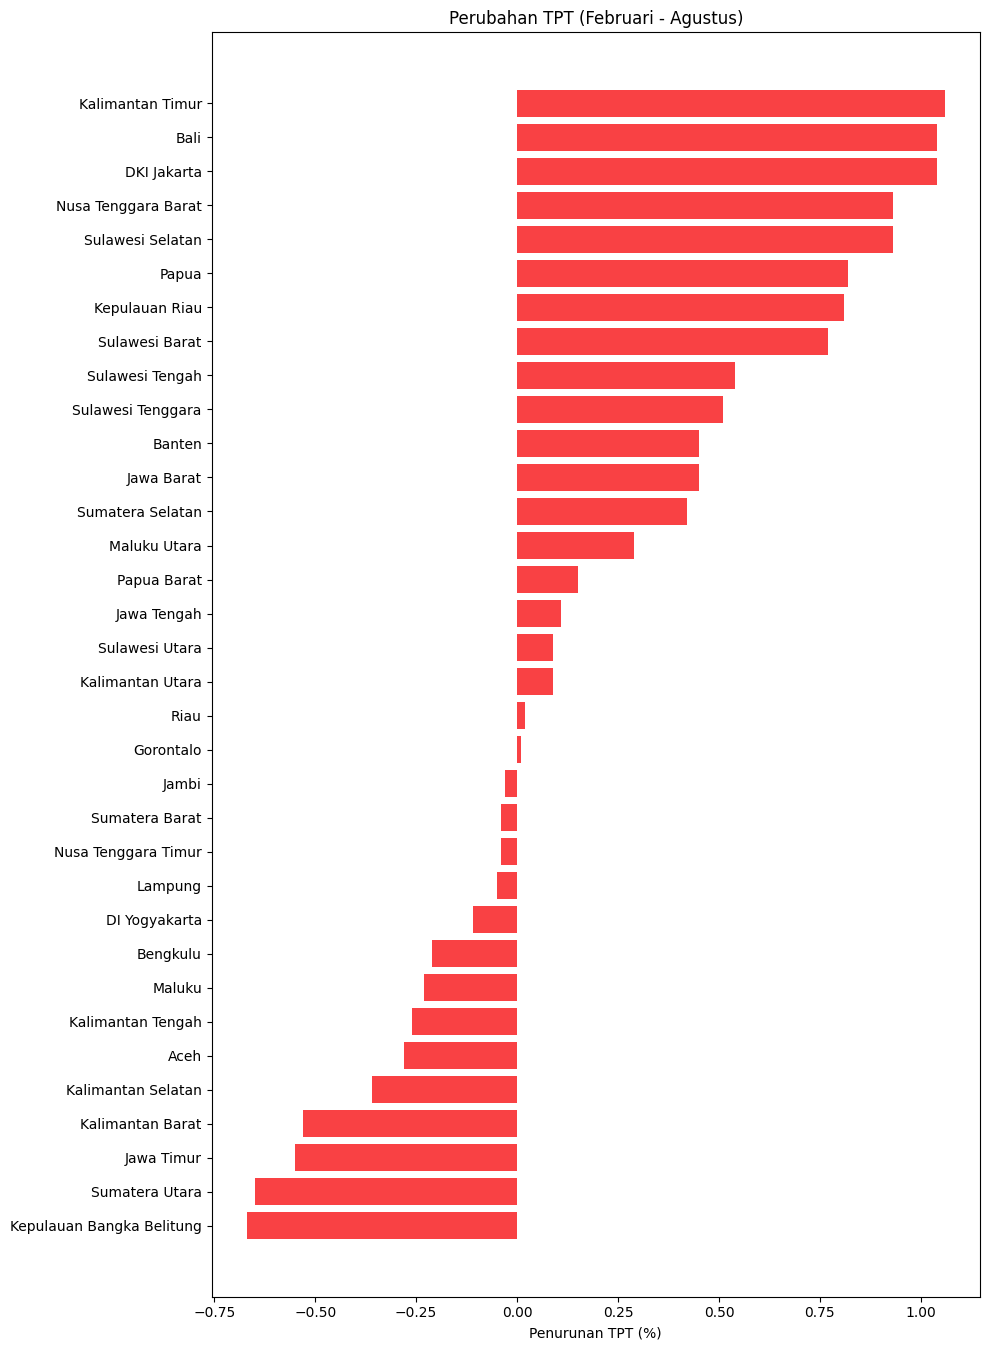

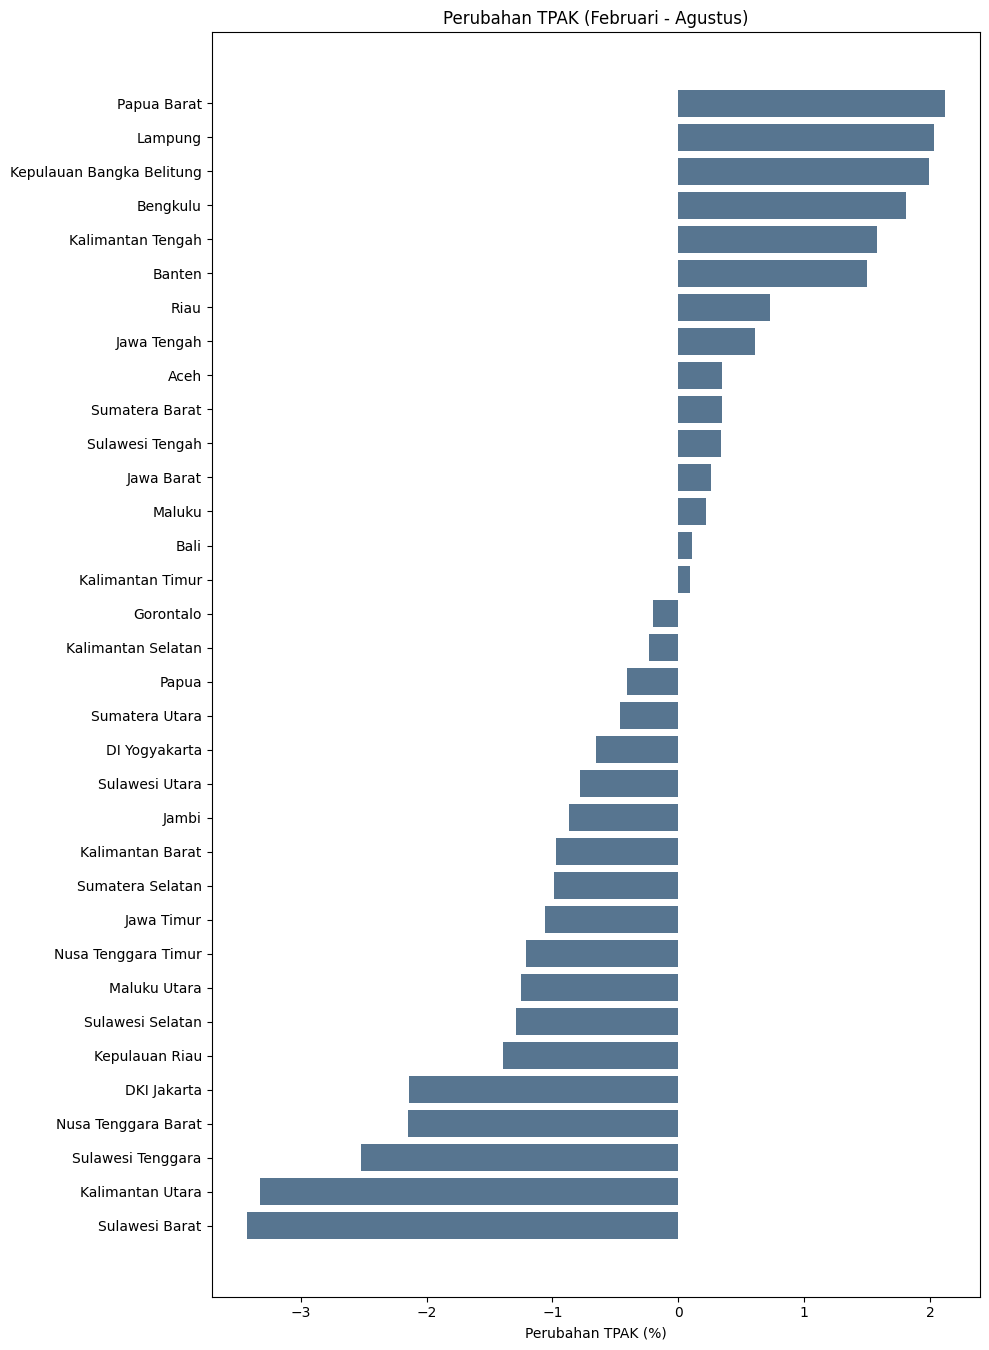

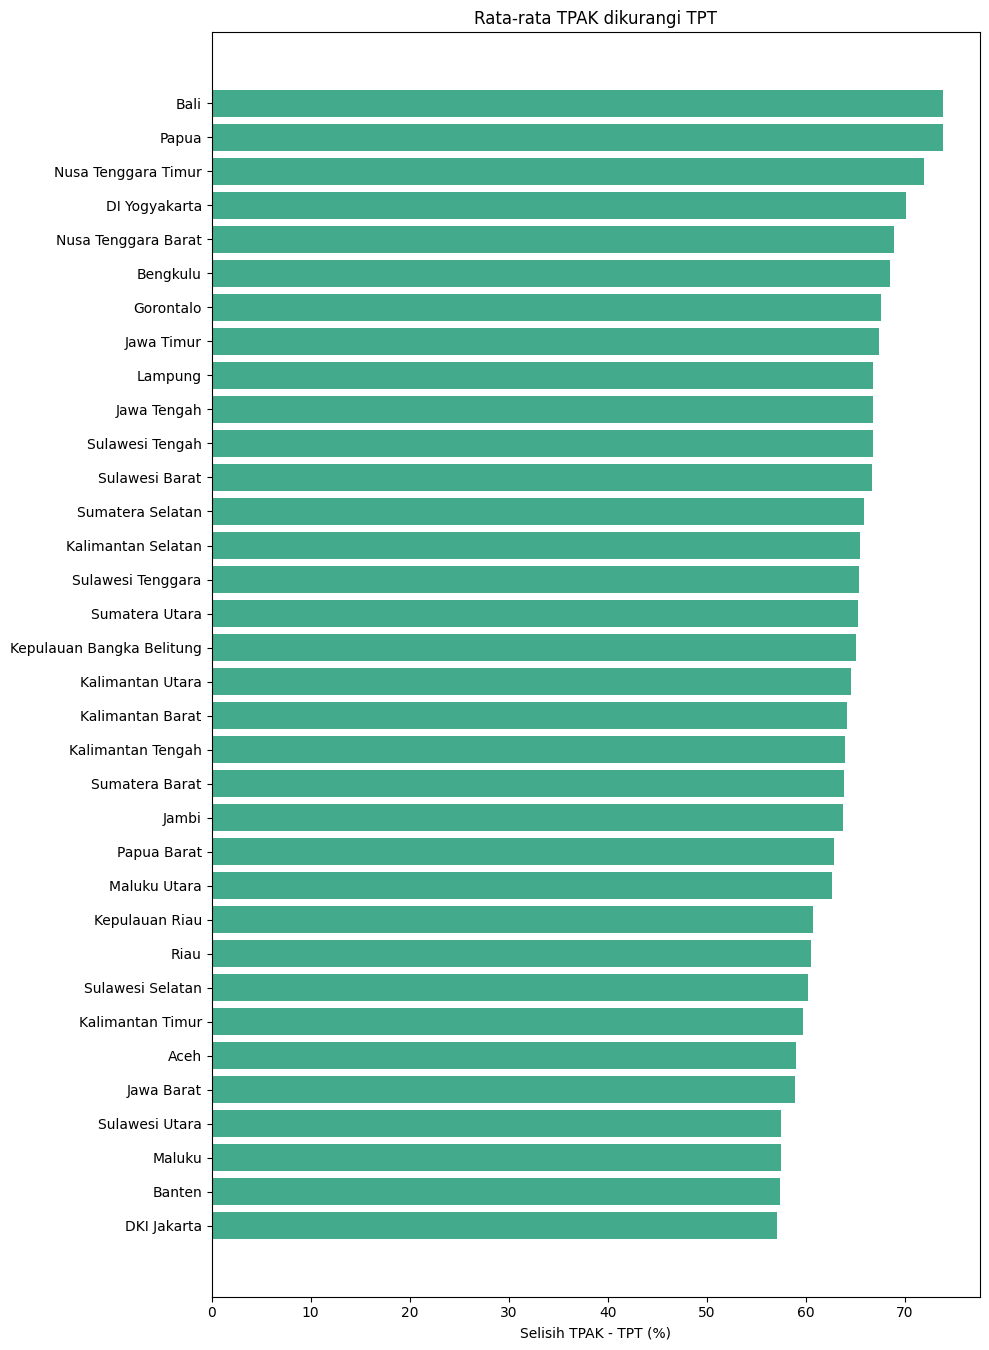

In [ ]:
import matplotlib.pyplot as plt

# Fungsi bantu untuk visualisasi bar horizontal
def plot_gap_list(data_list, title, xlabel, color):
    provinsi, gap = zip(*data_list)
    plt.figure(figsize=(10, len(provinsi) * 0.4))
    plt.barh(provinsi, gap, color=color)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.gca().invert_yaxis()  # agar ranking tertinggi di atas
    plt.tight_layout()
    plt.show()

# Visualisasi masing-masing list
plot_gap_list(gap_tpt_list, "Perubahan TPT (Februari - Agustus)", "Penurunan TPT (%)", "#f94144")
plot_gap_list(gap_tpat_list, "Perubahan TPAK (Februari - Agustus)", "Perubahan TPAK (%)", "#577590")
plot_gap_list(gap_tpak_tpt_list, "Rata-rata TPAK dikurangi TPT", "Selisih TPAK - TPT (%)", "#43aa8b")


TPAK tinggi, TPT rendah → ideal: banyak orang bekerja.

TPAK tinggi, TPT tinggi → banyak orang ingin kerja, tapi tidak terserap.

TPAK rendah, TPT rendah → bisa misleading: orang tidak kerja dan tidak cari kerja (menganggur tersembunyi).

# Choropleth

In [ ]:
df_geo = data.copy()

In [ ]:
df_geo.head()

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus
0,Aceh,5.75,6.03,65.12,64.77
1,Sumatera Utara,5.24,5.89,70.60,71.06
2,Sumatera Barat,5.90,5.94,69.96,69.61
3,Riau,4.25,4.23,65.18,64.45
4,Jambi,4.50,4.53,67.88,68.75


### menentukan parameter

In [ ]:
df_geo['rata - rata TPT'] = (
    df_geo['Tingkat Pengangguran Terbuka (TPT) - Februari'] +
    df_geo['Tingkat Pengangguran Terbuka (TPT) - Agustus']
) / 2

df_geo[['Provinsi','rata - rata TPT']]

,Provinsi,rata - rata TPT
0,Aceh,5.890
1,Sumatera Utara,5.565
2,Sumatera Barat,5.920
3,Riau,4.240
4,Jambi,4.515
5,Sumatera Selatan,4.320
6,Bengkulu,3.315
7,Lampung,4.205
8,Kepulauan Bangka Belitung,4.225
9,Kepulauan Riau,7.205


In [ ]:
df_geo['rata - rata TPAK'] = (
    df_geo['Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari'] +
    df_geo['Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus']
) / 2

df_geo[['Provinsi','rata - rata TPAK']]

,Provinsi,rata - rata TPAK
0,Aceh,64.945
1,Sumatera Utara,70.830
2,Sumatera Barat,69.785
3,Riau,64.815
4,Jambi,68.315
5,Sumatera Selatan,70.225
6,Bengkulu,71.815
7,Lampung,71.055
8,Kepulauan Bangka Belitung,69.335
9,Kepulauan Riau,67.985


In [ ]:
df_geo.to_csv('df_geo.csv', index=False)

In [ ]:
!pip install folium requests

In [ ]:
import requests

# Ambil data GeoJSON
url = 'https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province.json'
geojson = requests.get(url).json()

# Ambil daftar nama provinsi dari GeoJSON
nama_provinsi_geojson = [feature['properties']['Propinsi'] for feature in geojson['features']]

# Tampilkan nama provinsi
for prov in nama_provinsi_geojson:
    print(prov)


IRIAN JAYA TIMUR
NUSATENGGARA BARAT
GORONTALO
SULAWESI TENGGARA
DAERAH ISTIMEWA YOGYAKARTA
JAWA TENGAH
PROBANTEN
JAWA TIMUR
MALUKU UTARA
MALUKU
KALIMANTAN SELATAN
KALIMANTAN BARAT
SULAWESI SELATAN
DKI JAKARTA
JAWA BARAT
IRIAN JAYA TENGAH
NUSA TENGGARA TIMUR
BALI
RIAU
SULAWESI TENGAH
KALIMANTAN TIMUR
SULAWESI UTARA
IRIAN JAYA BARAT
SUMATERA UTARA
BANGKA BELITUNG
SUMATERA BARAT
KALIMANTAN TENGAH
SUMATERA SELATAN
JAMBI
LAMPUNG
BENGKULU
DI. ACEH


# Insight

 RUMUSAN MASALAH:

 Tantangan utama yang dihadapi Indonesia menjelang
 Tantangan utama yang dihadapi Indonesia menjelang
 2050 adalah tingginya tingkat pengangguran di
 2050 adalah tingginya tingkat pengangguran di
 beberapa provinsi, rendahnya partisipasi angkatan kerja,
 beberapa provinsi, rendahnya partisipasi angkatan kerja,
 serta mismatch antara keterampilan tenaga kerja dan
 kebutuhan industri.
 serta mismatch antara keterampilan tenaga kerja dan
 kebutuhan industri.
 Isu ini penting karena pengangguran dan rendahnya
 Isu ini penting karena pengangguran dan rendahnya
 partisipasi kerja menghambat produktivitas, memperbesar
 partisipasi kerja menghambat produktivitas, memperbesar
 ketimpangan, dan mengancam keberhasilan pemanfaatan
 ketimpangan, dan mengancam keberhasilan pemanfaatan
 bonus demografi yang menjadi kunci pertumbuhan
 bonus demografi yang menjadi kunci pertumbuhan
 ekonomi jangka panjang Indonesia

Cek nama

# Membuat visualisasi peta

In [ ]:
mapping_provinsi = {
    'Aceh': 'DI. ACEH',
    'Sumatera Utara': 'SUMATERA UTARA',
    'Sumatera Barat': 'SUMATERA BARAT',
    'Riau': 'RIAU',
    'Jambi': 'JAMBI',
    'Sumatera Selatan': 'SUMATERA SELATAN',
    'Bengkulu': 'BENGKULU',
    'Lampung': 'LAMPUNG',
    'Kepulauan Bangka Belitung': 'BANGKA BELITUNG',
    'Kepulauan Riau': 'BANGKA BELITUNG',
    'DKI Jakarta': 'DKI JAKARTA',
    'Jawa Barat': 'JAWA BARAT',
    'Jawa Tengah': 'JAWA TENGAH',
    'DI Yogyakarta': 'DAERAH ISTIMEWA YOGYAKARTA',
    'Jawa Timur': 'JAWA TIMUR',
    'Banten': 'PROBANTEN',
    'Bali': 'BALI',
    'Nusa Tenggara Barat': 'NUSATENGGARA BARAT',
    'Nusa Tenggara Timur': 'NUSA TENGGARA TIMUR',
    'Kalimantan Barat': 'KALIMANTAN BARAT',
    'Kalimantan Tengah': 'KALIMANTAN TENGAH',
    'Kalimantan Selatan': 'KALIMANTAN SELATAN',
    'Kalimantan Timur': 'KALIMANTAN TIMUR',
    'Kalimantan Utara': None,
    'Sulawesi Utara': 'SULAWESI UTARA',
    'Sulawesi Tengah': 'SULAWESI TENGAH',
    'Sulawesi Selatan': 'SULAWESI SELATAN',
    'Sulawesi Tenggara': 'SULAWESI TENGGARA',
    'Gorontalo': 'GORONTALO',
    'Sulawesi Barat': None,
    'Maluku': 'MALUKU',
    'Maluku Utara': 'MALUKU UTARA',
    'Papua Barat': 'IRIAN JAYA BARAT',
    'Papua': 'IRIAN JAYA TENGAH',
}


In [ ]:
df_geo['Provinsi_geo'] = df_geo['Provinsi'].replace(mapping_provinsi)

In [ ]:
df_clean = df_geo.dropna(subset=['Provinsi_geo'])

In [ ]:
df_clean

,Provinsi,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus,rata - rata TPT,rata - rata TPAK,Provinsi_geo
0,Aceh,5.75,6.03,65.12,64.77,5.890,64.945,DI. ACEH
1,Sumatera Utara,5.24,5.89,70.60,71.06,5.565,70.830,SUMATERA UTARA
2,Sumatera Barat,5.90,5.94,69.96,69.61,5.920,69.785,SUMATERA BARAT
3,Riau,4.25,4.23,65.18,64.45,4.240,64.815,RIAU
4,Jambi,4.50,4.53,67.88,68.75,4.515,68.315,JAMBI
5,Sumatera Selatan,4.53,4.11,69.73,70.72,4.320,70.225,SUMATERA SELATAN
6,Bengkulu,3.21,3.42,72.72,70.91,3.315,71.815,BENGKULU
7,Lampung,4.18,4.23,72.07,70.04,4.205,71.055,LAMPUNG
8,Kepulauan Bangka Belitung,3.89,4.56,70.33,68.34,4.225,69.335,BANGKA BELITUNG
9,Kepulauan Riau,7.61,6.80,67.29,68.68,7.205,67.985,BANGKA BELITUNG


In [ ]:
df_clean.describe()

,Tingkat Pengangguran Terbuka (TPT) - Februari,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari,Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus,rata - rata TPT,rata - rata TPAK
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,4.882812,4.705938,69.114375,69.254375,4.794375,69.184375
std,1.445889,1.394968,3.665721,3.693775,1.396465,3.625847
min,3.070000,2.670000,63.070000,63.600000,3.065000,63.700000
25%,3.730000,3.622500,66.375000,66.282500,3.577500,66.368750
50%,4.510000,4.430000,69.445000,69.515000,4.485000,69.135000
75%,5.787500,5.902500,71.245000,70.947500,5.852500,71.245000
max,7.970000,7.520000,77.190000,77.200000,7.745000,77.135000


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provinsi                                              32 non-null     object 
 1   Tingkat Pengangguran Terbuka (TPT) - Februari         32 non-null     float64
 2   Tingkat Pengangguran Terbuka (TPT) - Agustus          32 non-null     float64
 3   Tingkat Partisipasi Angkatan Kerja (TPAK) - Februari  32 non-null     float64
 4   Tingkat Partisipasi Angkatan Kerja (TPAK) - Agustus   32 non-null     float64
 5   rata - rata TPT                                       32 non-null     float64
 6   Provinsi_geo                                          32 non-null     object 
dtypes: float64(5), object(2)
memory usage: 2.0+ KB


In [ ]:
import requests
import folium

# Ambil geojson dari GitHub
geojson_url = 'https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province.json'
geojson = requests.get(geojson_url).json()

# Inisialisasi peta
m = folium.Map(location=[-2.5, 117], zoom_start=5)

# Buat choropleth berdasarkan nama provinsi yang disamakan
folium.Choropleth(
    geo_data=geojson,
    name='choropleth',
    data=df_clean,
    columns=['Provinsi_geo', 'rata - rata TPT'],
    key_on='feature.properties.Propinsi',  # Ini field dari geojson
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Rata-rata TPT (%) per Provinsi'
).add_to(m)

# Tampilkan peta
m.save('peta_rata_tpt.html')

# Download Data untuk Pembuatan Dashboard di Tableau

In [ ]:
df.to_csv('df_clean.csv', index=False)